In [1]:
# Cargando las librerias necesarias
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [305]:
# Cargando el dataframe
df = pd.read_csv("database.csv", index_col=0)

In [306]:
# Primeras 3 filas del conjunto de datos
df.head(7)

,artista,nombre_de_musica,letra_musica,year
numero,,,,
0,Johnny Cash,Bird On A Wire,Like a bird on a wire Like a drunk in a midnig...,1994
1,Johnny Cash,Delia's Gone,"Delia, oh, Delia Delia all my life , If I hadn...",1994
2,Johnny Cash,Down There By The Train,There's a place I know where the train goes sl...,1994
3,Johnny Cash,Drive On,I got a friend named Whiskey Sam \r\nHe was my...,1994
4,Johnny Cash,Let The Train Blow The Whistle,I don't want no aggravation \r\nWhen my train ...,1994
5,Johnny Cash,Like A Soldier,With the twilight colors falling \r\nAnd the e...,1994
6,Reba Mcentire,I Sacrificed More Than You'll Ever Lose,Needing new clothes with the money you spent\r...,2005


In [307]:
# Imprimiendo información básica sobre el conjunto de datos usando las funciones print() y .format()

print("Existen {} datos y {} caracteristicas en este conjunto de datos. \n".format(df.shape[0],df.shape[1]))
print("Existen {} tipos de artista en este conjunto de datos, tales como: {}... \n".format(len(df.artista.unique()),
                                                                           ", ".join(df.artista.unique()[0:5])))
# print("Existen {} musicas del mismo año en este conjunto de datos como: {}... \n".format(len(df.year.unique()),
#                                                                                       ", ".join(df.year.unique()[0:5]) ) )

Existen 23 datos y 4 caracteristicas en este conjunto de datos. 

Existen 4 tipos de artista en este conjunto de datos, tales como: Johnny Cash, Reba Mcentire, Michael Jackson, Shakira... 



In [308]:
# Imprimiendo información de artista, titulo y cancion
df[["artista", "nombre_de_musica","letra_musica"]].head(7)

,artista,nombre_de_musica,letra_musica
numero,,,
0,Johnny Cash,Bird On A Wire,Like a bird on a wire Like a drunk in a midnig...
1,Johnny Cash,Delia's Gone,"Delia, oh, Delia Delia all my life , If I hadn..."
2,Johnny Cash,Down There By The Train,There's a place I know where the train goes sl...
3,Johnny Cash,Drive On,I got a friend named Whiskey Sam \r\nHe was my...
4,Johnny Cash,Let The Train Blow The Whistle,I don't want no aggravation \r\nWhen my train ...
5,Johnny Cash,Like A Soldier,With the twilight colors falling \r\nAnd the e...
6,Reba Mcentire,I Sacrificed More Than You'll Ever Lose,Needing new clothes with the money you spent\r...


In [309]:
# Agrupación por artista
artista = df.groupby("artista")

# Resumen estadístico de todos los artistas.
artista.describe().head()

year                                                     
                count    mean  std     min     25%     50%     75%     max
artista                                                                   
Johnny Cash       6.0  1994.0  0.0  1994.0  1994.0  1994.0  1994.0  1994.0
Michael Jackson   6.0  1979.0  0.0  1979.0  1979.0  1979.0  1979.0  1979.0
Reba Mcentire     5.0  2005.0  0.0  2005.0  2005.0  2005.0  2005.0  2005.0
Shakira           6.0  1993.0  0.0  1993.0  1993.0  1993.0  1993.0  1993.0

In [310]:
# Seleccionamos los 6 puntos promedio más altos entre los artistas
artista.mean().sort_values(by="year",ascending=False).head(5)
#COMENTADOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

,year
artista,
Reba Mcentire,2005
Johnny Cash,1994
Shakira,1993
Michael Jackson,1979


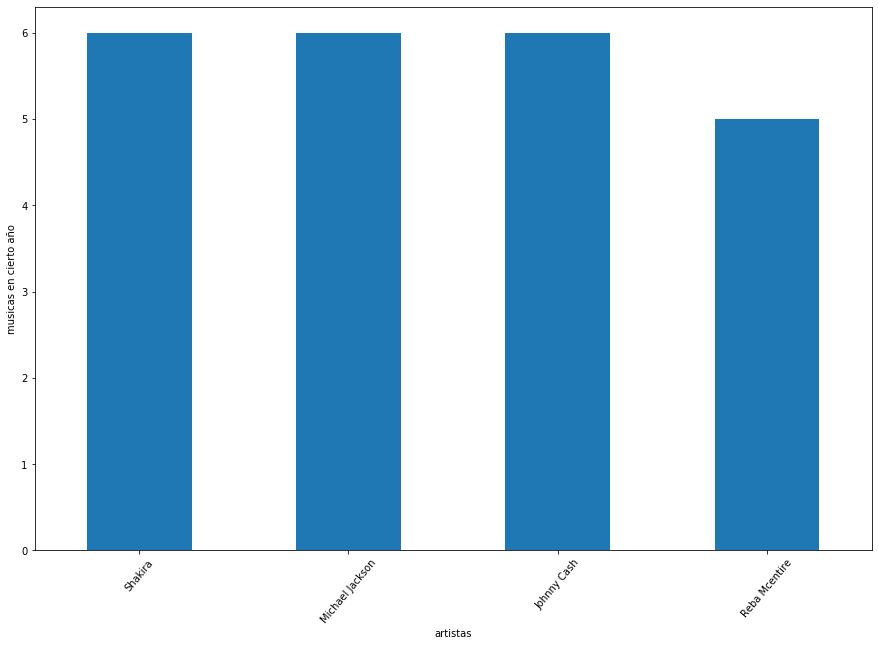

In [311]:
# Graficando el histograma de frecuencua de los ARTISTAS y AL AÑO
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
artista.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("artistas")
plt.ylabel("musicas en cierto año")
plt.show()

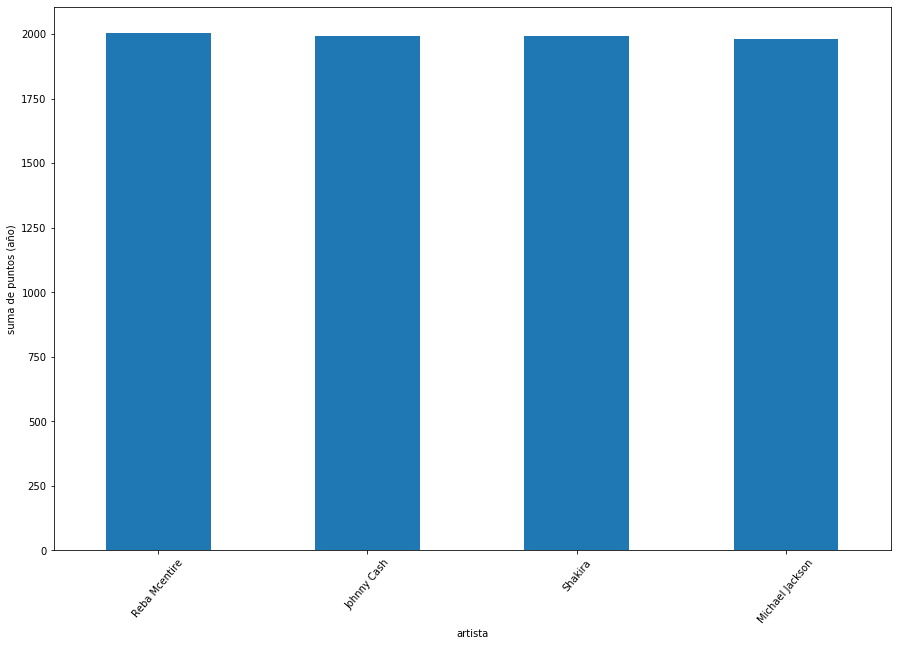

In [312]:
# Graficando el histograma de frecuencua de los artistas y el año(puntos) ... sumatoria
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
artista.max().sort_values(by="year",ascending=False)["year"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("artista")
plt.ylabel("suma de puntos (año)")
plt.show()
# COMENTADOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [313]:
# Comencemos con la letra de musica.. descrpción
musica = df.letra_musica[1]
musica

"Delia, oh, Delia Delia all my life , If I hadn't have shot poor \r\nDelia I'd have had her for my wife , Delia's gone, one more round Delia's gone, I went up to Memphis , And I met Delia there Found her in her parlor , And I tied to her chair , Delia's gone, one more round Delia's gone, She was low down and trifling , And she was cold and mean , Kind of evil make me want to Grab my sub machine , Delia's gone, one more round Delia's gone\r\nFirst time I shot her I shot her in the side , Hard to watch her suffer , But with the second shot she died , Delia's gone, one more round Delia's gone, But jailer, oh, jailer Jailer,I can't sleep 'Cause all around my bedside , I hear the patter of Delia's feet , Delia's gone, one more round Delia's gone, So if you woman's devilish , You can let her run , Or you can bring her down and do her , Like Delia, got done , Delia's gone, one more round Delia's gone"

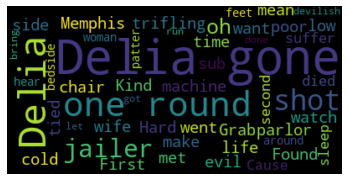

In [314]:
# Creando y generando una imagen de nube de palabras.
wordcloud = WordCloud().generate(musica)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

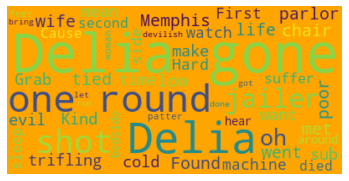

In [315]:
# Bajando el max_font_size, cambiando el número máximo de palabras y colocando un fodo de color
wordcloud = WordCloud(max_font_size=90, max_words=150, background_color="Orange").generate(musica)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [316]:
# Guardando la imagen
wordcloud.to_file("prueba1.png")

In [317]:
# Combinaciones de palabras de la columna letra_musica
text = " ".join(review for review in df.letra_musica)
print ("Hay {} palabras en la combinación de todas las revisiones.".format(len(text)))

Hay 17601 palabras en la combinación de todas las revisiones.


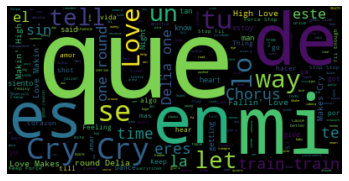

In [318]:
# Creando la lista stopwords a quitar:
stopwords = set(STOPWORDS)
stopwords.update(["Delia", "gone", "midnight", "tried", "drunk"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

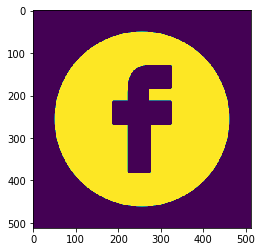

(512, 512)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [319]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("facebook.png"))
# wine_mask.resize((512,512))

plt.imshow(np.asarray(wine_mask))
plt.show()

print (wine_mask.shape)
wine_mask

In [320]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0

In [321]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

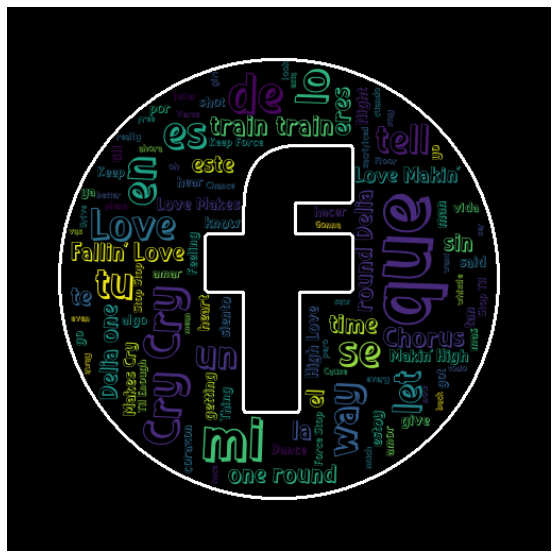

In [328]:
# Creando una imagen de nube de palabras
tipo_letra = "shadow.otf"

wc = WordCloud( font_path = tipo_letra, prefer_horizontal = 0.45 , background_color="black",max_words=100, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
# guardar archivo como....
wc.to_file("prueba2.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [329]:
def transform_format(val):
    if val == 0:
        return 0
    else:
        return 255

In [330]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

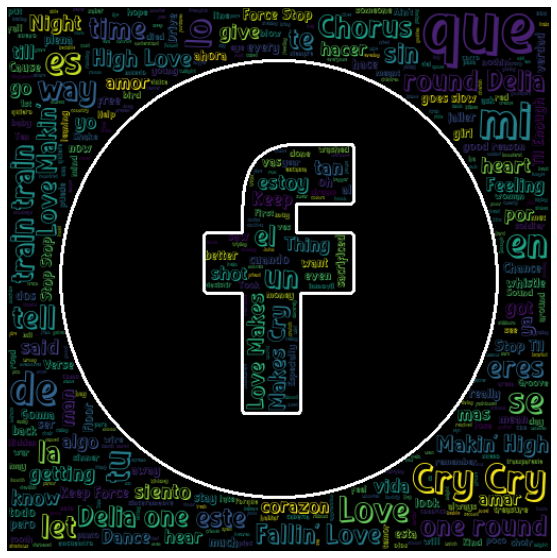

In [331]:
# Creando una imagen de nube de palabras
wc = WordCloud(font_path = tipo_letra, background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()